In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T=pd.read_csv('Telco.csv')

In [4]:
T.head()

,Calls,Intern,Text,Data,Age
0,1.12,0.19,23.92,0.18,60
1,1.08,0.22,17.76,0.23,54
2,3.54,0.26,289.79,1.99,34
3,1.09,0.21,19.15,0.21,61
4,1.04,0.24,20.33,0.20,56


In [5]:
T_scaled=T.apply(lambda x: (x-np.mean(x))/np.std(x))

In [6]:
T_scaled.head()


,Calls,Intern,Text,Data,Age
0,-0.996125,-0.569290,-0.940982,-1.299162,1.372936
1,-1.022513,-0.489795,-0.969806,-1.262765,1.002273
2,0.600387,-0.383802,0.303060,0.018380,-0.233271
3,-1.015916,-0.516293,-0.963302,-1.277324,1.434713
4,-1.048902,-0.436798,-0.957780,-1.284603,1.125827


In [7]:
T_scaled.describe()

,Calls,Intern,Text,Data,Age
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.989964e-15,-2.852385e-15,1.069034e-15,-1.973387e-15,-2.446932e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.174248e+00,-8.342729e-01,-9.733149e-01,-1.306441e+00,-1.592368e+00
25%,-7.520297e-01,-7.812762e-01,-9.557213e-01,-1.051668e+00,-8.510422e-01
50%,-3.891861e-01,-4.897948e-01,-1.614142e-01,1.110083e-02,-1.714934e-01
75%,5.690510e-01,1.020609e+00,1.050073e+00,6.826104e-01,8.169412e-01
max,2.223288e+00,2.107040e+00,1.749616e+00,2.056566e+00,2.114262e+00


### Plotting the Dendogram

In [8]:
import scipy
from scipy.cluster.hierarchy import dendrogram , linkage

In [9]:
z=linkage(T_scaled, 'complete')

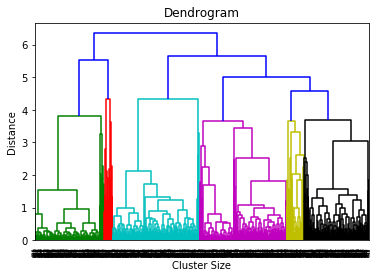

In [10]:
dendrogram(z,leaf_rotation=90, leaf_font_size=5)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

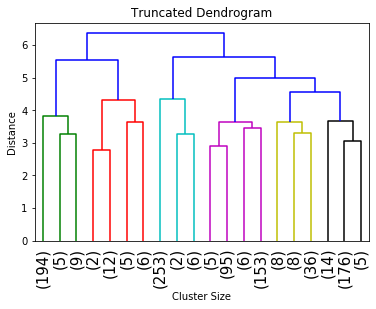

In [11]:
dendrogram(z,truncate_mode='lastp',p=20,leaf_rotation=90, leaf_font_size=15)
plt.title("Truncated Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

### Agglomerative Clusterring

In [12]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [13]:
clust=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [14]:
clust.fit(T_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5)

In [28]:
clust.compute_full_tree

'auto'

In [15]:
T['Groups']=clust.labels_

In [16]:
T.head(5)

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,3
1,1.08,0.22,17.76,0.23,54,3
2,3.54,0.26,289.79,1.99,34,4
3,1.09,0.21,19.15,0.21,61,3
4,1.04,0.24,20.33,0.20,56,3


In [17]:
T.groupby(['Groups']).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,4.472227,1.010486,82.832146,2.009190,43.149798
1,4.700400,0.432400,376.350800,1.545600,46.120000
2,1.763410,0.131456,507.732146,3.731073,19.003831
3,1.068846,0.238702,45.874567,0.355288,60.610577
4,2.800039,0.233514,204.993282,1.475405,32.424710


### K Means Clustering 

In [18]:
from sklearn.cluster import KMeans

In [45]:
km=KMeans(n_clusters=5, n_init=40)

In [46]:
km.fit(T_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=40, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
#km.labels_
T1=pd.read_csv('Telco.csv')

In [48]:
T1['Clusters']=km.labels_

In [49]:
T1.groupby(['Clusters']).mean()

,Calls,Intern,Text,Data,Age
Clusters,,,,,
0,1.710430,0.110859,509.621641,3.731875,18.949219
1,2.319892,0.106559,22.398602,0.522366,35.548387
2,5.042850,1.012367,49.653140,2.072705,45.294686
3,2.966475,0.470328,315.840492,1.974959,33.155738
4,1.043100,0.211150,25.660400,0.249350,60.765000


Kmeans

	Calls	Intern	Text	Data	Age
Clusters					
0	1.710430	0.110859	509.621641	3.731875	18.949219
1	2.319892	0.106559	22.398602	0.522366	35.548387
2	5.042850	1.012367	49.653140	2.072705	45.294686
3	2.966475	0.470328	315.840492	1.974959	33.155738
4	1.043100	0.211150	25.660400	0.249350	60.765000


Agglomerative

                Calls	Intern Text	Data	Age
Groups					
0	4.472227	1.010486	82.832146	2.009190	43.149798
1	4.700400	0.432400	376.350800	1.545600	46.120000
2	1.763410	0.131456	507.732146	3.731073	19.003831
3	1.068846	0.238702	45.874567	0.355288	60.610577
4	2.800039	0.233514	204.993282	1.475405	32.424710

In [22]:
#winthin group SSE
km.inertia_

785.9308775068455

In [23]:
#calculating winthin group SSE for different cluster solutions
inertias= []
for k in [2,3,4,5,6,7]:
    km=KMeans(n_clusters=k,n_init=40)
    inertia=km.fit(T_scaled).inertia_
    inertias.append(inertia)

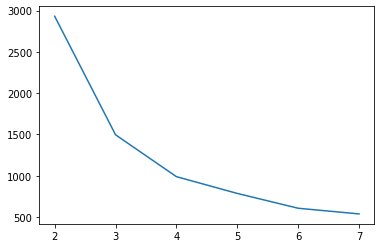

In [24]:
plt.plot([2,3,4,5,6,7], inertias)
plt.show()